In [1]:
# pip install -r requirements.txt

# 1. Data crawling

## 1.1. Libraries

- Selenium
- Beautiful soup
- Pandas
- PLotly
- Advertools

## 1.2. Crawling procedure

- Write a script to access the Facebook pages of the brands using Selenium.
  - Timeframe: 02/2024 - 04/2024.
- Parse the HTML page with Beautiful Soup, then save it as a CSV file.

## 1.3. Pros & Cons

**Advantages:**

- Free and easy-to-use library.

**Disadvantages:**

- Unable to automatically retrieve share counts; manual collection required.
- Unable to fetch complete post content (due to "read more" buttons).
- Unable to fetch video posts; only able to fetch image posts.


## 1.4. Import


In [2]:
import pandas as pd
# Set up the display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import advertools as adv
import datetime

import mercury as mr
import os

In [3]:
# configure App properties
app = mr.App(title="Report", description="The Brand Watch report provides a comprehensive social media audit of Coke, Pepsi, and Fanta, analyzing their marketing activities, content strategies, and performance over two months.", static_notebook=True, show_code=False)

mercury.App

## 1.5. Data preparation

### 1.5.1. Brand followers


In [4]:
brand_follower = [('coke', int(109000000)), ('pepsi', int(36000000)), ('fanta', int(18000000))]

# Chuyển list của tuples thành DataFrame
brand_follower_df = pd.DataFrame([followers for _, followers in brand_follower], index=[brand for brand, _ in brand_follower], columns=['Followers']).T
brand_follower_df = brand_follower_df.reset_index(drop=True)
brand_follower_df

,coke,pepsi,fanta
0,109000000,36000000,18000000


### 1.5.2. Coke


In [5]:
coke = pd.read_csv('crawl_coke_data.csv')
coke['brand'] = 'coke'

coke.loc[coke['title'].isna(), 'content'] = 'Cover or Avatar'
coke['title'] = coke['title'].fillna('Cover or Avatar')

coke['body'] = coke['content'].apply(lambda x: x[1:] if len(x) > 1 else [])

coke = coke.fillna(0)

In [6]:
coke_post_share = [22,1,3,7,6,1,14,14,50,1,18,26,4,22,8,2,6,47,3,15,9,5,3157,5,270,9,53,8,20,1239,0,8,52,40,3,]
coke['share_count'] = coke_post_share
coke.head()

,date,content,reaction_count,top_react,comment_count,title,day_diff,brand,body,share_count
0,02/02,"['Lon đỏ Rồng vàng, vận may ngập trànLì xì lộc...",12240,"['Like', 'Heart']",121,"Lon đỏ Rồng vàng, vận may ngập trànLì xì lộc p...",0.0,coke,"'Lon đỏ Rồng vàng, vận may ngập trànLì xì lộc ...",22
1,05/02,['LỘC RỒNG CẬN TẾT GỌI TÊN 2 NGƯỜI CHƠI MAY MẮ...,66,"['Like', 'Heart']",25,LỘC RỒNG CẬN TẾT GỌI TÊN 2 NGƯỜI CHƠI MAY MẮN ...,3.0,coke,'LỘC RỒNG CẬN TẾT GỌI TÊN 2 NGƯỜI CHƠI MAY MẮN...,1
2,08/02,['LỘC RỒNG VỀ TAY 02 CHIẾN THẦN NGAY TRƯỚC THỀ...,61,"['Like', 'Heart']",33,LỘC RỒNG VỀ TAY 02 CHIẾN THẦN NGAY TRƯỚC THỀM ...,3.0,coke,'LỘC RỒNG VỀ TAY 02 CHIẾN THẦN NGAY TRƯỚC THỀM...,3
3,10/02,"['Mở bát năm 2024 bằng thật nhiều ""Hy vọng"" cù...",2136,"['Like', 'Heart']",105,"Mở bát năm 2024 bằng thật nhiều ""Hy vọng"" cùng...",2.0,coke,"'Mở bát năm 2024 bằng thật nhiều ""Hy vọng"" cùn...",7
4,12/02,"['Đang chơi mà sao thấy cấn cấn ngang á😂', '#C...",617,"['Like', 'Heart']",23,Đang chơi mà sao thấy cấn cấn ngang á😂,2.0,coke,"'Đang chơi mà sao thấy cấn cấn ngang á😂', '#Co...",6


### 1.5.3. Pepsi


In [7]:
pepsi = pd.read_csv('crawl_pepsi_data.csv')
pepsi['brand'] = 'pepsi'

pepsi.loc[pepsi['title'].isna(), 'content'] = 'Cover or Avatar'
pepsi['title'] = pepsi['title'].fillna('Cover or Avatar')

pepsi['body'] = pepsi['content'].apply(lambda x: x[1:] if len(x) > 1 else [])

pepsi = pepsi.fillna(0)

In [8]:
pepsi_post_share = [10,4,10,1,11,5,52,9,72,165,16,36,304,21,19,5,2,27,59,3,4,16,46,36,2,17,6,13,31]
pepsi['share_count'] = pepsi_post_share
pepsi.head()

,date,content,reaction_count,top_react,comment_count,title,day_diff,brand,body,share_count
0,02/02,"['MANG PEPSI VỀ NHÀ, TIỆC TẾT BAO ĐÃ🍻', '💙Mỗi ...",517,"['Like', 'Heart', 'Angry']",12,"MANG PEPSI VỀ NHÀ, TIỆC TẾT BAO ĐÃ🍻",0.0,pepsi,"'MANG PEPSI VỀ NHÀ, TIỆC TẾT BAO ĐÃ🍻', '💙Mỗi d...",10
1,05/02,['NHỮNG CHUYẾN XE ĐẦU TIÊN - SẴN SÀNG CHỞ TẾT ...,78,"['Like', 'Heart']",3,NHỮNG CHUYẾN XE ĐẦU TIÊN - SẴN SÀNG CHỞ TẾT VỀ...,3.0,pepsi,'NHỮNG CHUYẾN XE ĐẦU TIÊN - SẴN SÀNG CHỞ TẾT V...,4
2,05/02,"['THÁP LỄ PEPSI VÀNG, TRAO NGÀN TÀI LỘC', '💛Nế...",2926,"['Like', 'Heart']",64,"THÁP LỄ PEPSI VÀNG, TRAO NGÀN TÀI LỘC",0.0,pepsi,"'THÁP LỄ PEPSI VÀNG, TRAO NGÀN TÀI LỘC', '💛Nếu...",10
3,07/02,['LỄ TIỄN MANG TẾT VỀ NHÀ 2024TIẾP NỐI SỨ MỆNH...,108,"['Like', 'Heart']",6,LỄ TIỄN MANG TẾT VỀ NHÀ 2024TIẾP NỐI SỨ MỆNH T...,2.0,pepsi,'LỄ TIỄN MANG TẾT VỀ NHÀ 2024TIẾP NỐI SỨ MỆNH ...,1
4,27/02,"['COMING SOON...', 'SẮP RA MẮT...']",2578,"['Like', 'Heart']",85,COMING SOON...,20.0,pepsi,"'COMING SOON...', 'SẮP RA MẮT...']",11


### 1.5.4. Fanta


In [9]:
fanta = pd.read_csv('crawl_fanta_data.csv')
fanta['brand'] = 'fanta'

fanta.loc[fanta['title'].isna(), 'content'] = 'Cover or Avatar'
fanta['title'] = fanta['title'].fillna('Cover or Avatar')

fanta['body'] = fanta['content'].apply(lambda x: x[1:] if len(x) > 1 else [])

fanta = fanta.fillna(0)

In [10]:
fanta_post_share = [2,411,34,1,0,9,14]
fanta['share_count'] = fanta_post_share
fanta.head()

,date,content,reaction_count,top_react,comment_count,title,day_diff,brand,body,share_count
0,05/02,"['ĐÓN TẾT THÌN RÔM RẢ, CÓ NGAY COMBO FANTAAAAA...",69,"['Like', 'Heart']",1,"ĐÓN TẾT THÌN RÔM RẢ, CÓ NGAY COMBO FANTAAAAAAAA",0.0,fanta,"'ĐÓN TẾT THÌN RÔM RẢ, CÓ NGAY COMBO FANTAAAAAA...",2
1,06/02,"['[MINIGAME] BÌNH LUẬN CHÚC TẾT ĐỘC LẠ, NHẬN Q...",4104,"['Like', 'Heart', 'Wow']",4631,"[MINIGAME] BÌNH LUẬN CHÚC TẾT ĐỘC LẠ, NHẬN QUÀ...",1.0,fanta,"'[MINIGAME] BÌNH LUẬN CHÚC TẾT ĐỘC LẠ, NHẬN QU...",411
2,25/03,"['FANTA BÙNG NỔ DIỆN MẠO MỚI, VẪN CỨ LÀ NGON N...",5651,"['Like', 'Heart']",161,"FANTA BÙNG NỔ DIỆN MẠO MỚI, VẪN CỨ LÀ NGON NHỨ...",47.0,fanta,"'FANTA BÙNG NỔ DIỆN MẠO MỚI, VẪN CỨ LÀ NGON NH...",34
3,25/03,Cover or Avatar,60,"['Like', 'Heart']",11,Cover or Avatar,0.0,fanta,over or Avatar,1
4,25/03,Cover or Avatar,26,"['Like', 'Heart']",0,Cover or Avatar,0.0,fanta,over or Avatar,0


### 1.5.6. df


In [11]:
df = pd.concat([coke, pepsi, fanta])

brands = ['coke', 'pepsi', 'fanta']

brand_dfs = {'coke': coke, 'pepsi': pepsi, 'fanta': fanta}

# 2. EDA

## 2.1. Summary statistics

### 2.1.1. Plot

#### a. describe()


In [12]:
coke.describe().T

,count,mean,std,min,25%,50%,75%,max
reaction_count,35.0,3046.314286,10657.433428,30.0,71.5,312.0,1622.0,62635.0
comment_count,35.0,442.857143,1341.471693,0.0,7.5,27.0,96.5,5646.0
day_diff,35.0,2.371429,1.971648,0.0,1.0,2.0,3.0,7.0
share_count,35.0,147.085714,564.458479,0.0,4.5,9.0,24.0,3157.0


In [13]:
pepsi.describe().T

,count,mean,std,min,25%,50%,75%,max
reaction_count,29.0,967.034483,1175.071684,76.0,312.0,456.0,1049.0,5168.0
comment_count,29.0,62.793103,121.214208,0.0,8.0,23.0,62.0,582.0
day_diff,29.0,1.862069,3.851940,0.0,0.0,1.0,1.0,20.0
share_count,29.0,34.551724,61.265573,1.0,5.0,16.0,36.0,304.0


In [14]:
fanta.describe().T

,count,mean,std,min,25%,50%,75%,max
reaction_count,7.0,2200.285714,2472.123494,26.0,64.5,917.0,4339.5,5651.0
comment_count,7.0,698.857143,1734.850371,0.0,6.0,22.0,113.5,4631.0
day_diff,7.0,11.000000,17.776389,0.0,0.0,1.0,14.5,47.0
share_count,7.0,67.285714,152.023808,0.0,1.5,9.0,24.0,411.0


#### b. Violin plot


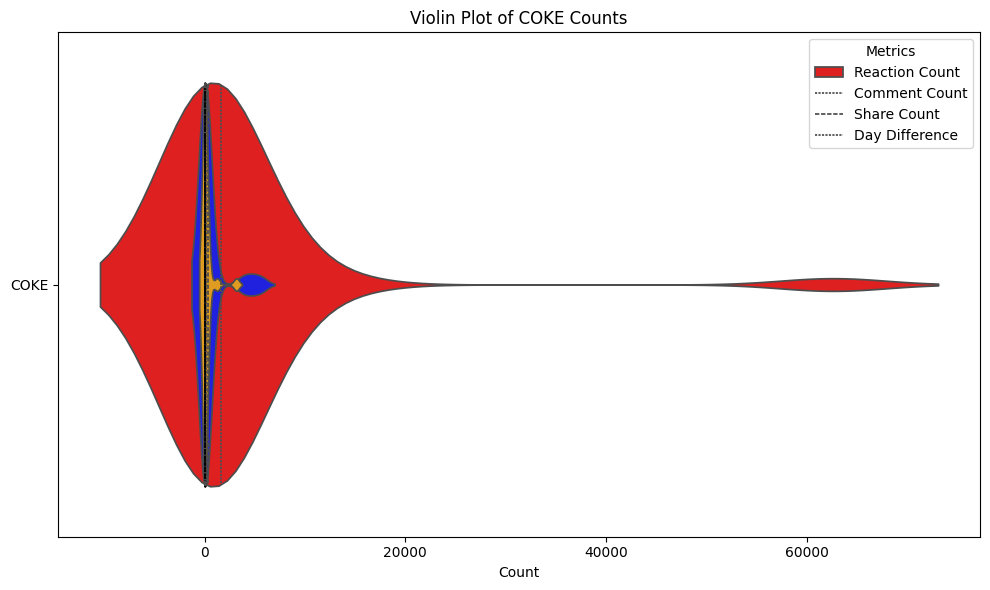

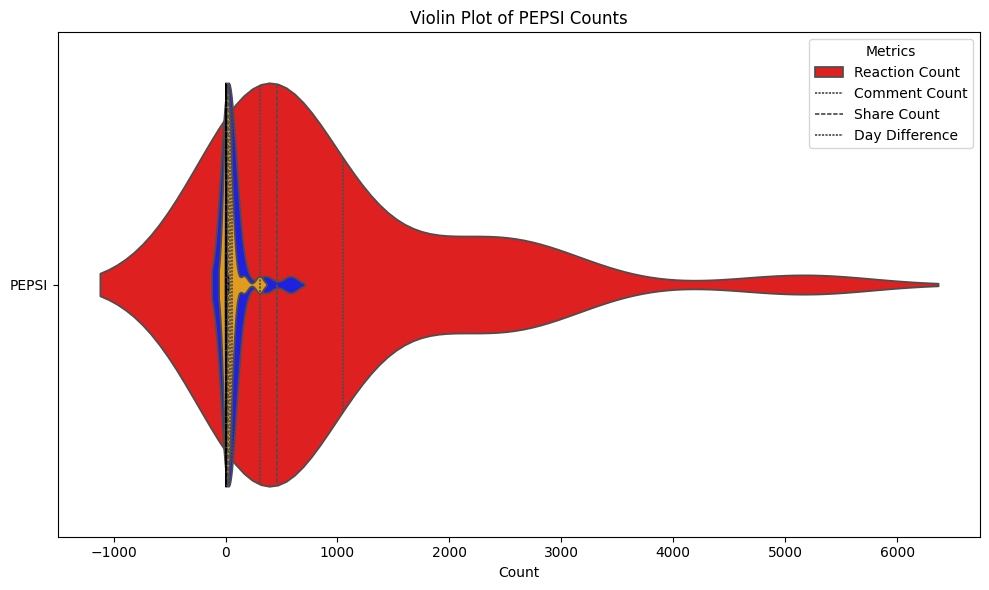

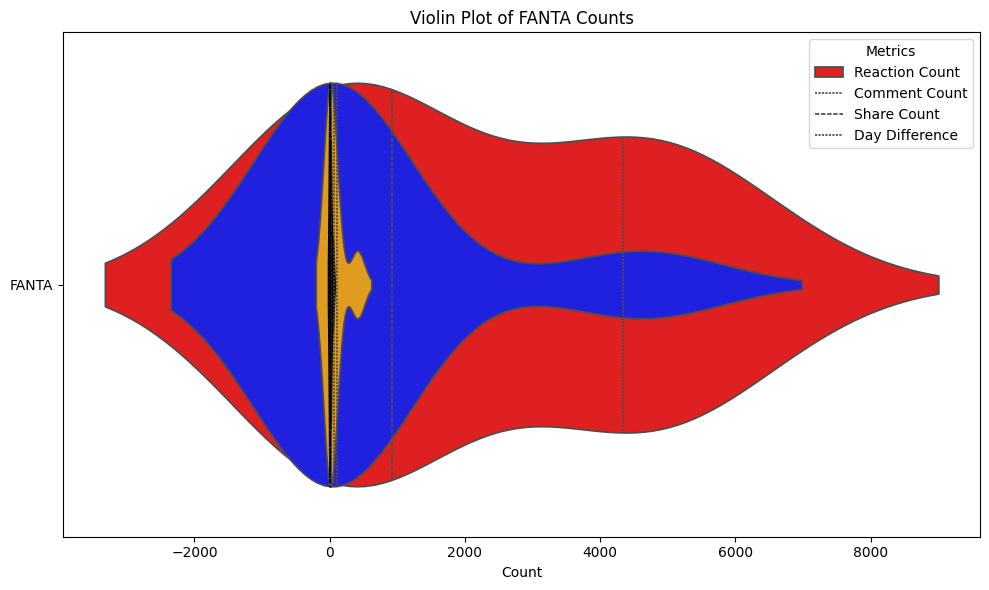

In [15]:
colors = ['#ff0000', '#0000ff', '#ffa500', '#000']  # Pastel colors: light pink, light blue, light peach

for brand in brands:
    brand_data_reaction = df[df['brand'] == brand]['reaction_count']
    brand_data_comment = df[df['brand'] == brand]['comment_count']
    brand_data_share = df[df['brand'] == brand]['share_count']
    brand_data_day_diff = df[df['brand'] == brand]['day_diff']
    
    plt.figure(figsize=(10, 6))
    
    sns.violinplot(x=brand_data_reaction, color=colors[0], inner='quartile')
    sns.violinplot(x=brand_data_comment, color=colors[1], inner='quartile')
    sns.violinplot(x=brand_data_share, color=colors[2], inner='quartile')
    sns.violinplot(x=brand_data_day_diff, color=colors[3], inner='quartile')
    
    plt.title(f'Violin Plot of {brand.upper()} Counts')
    plt.xlabel('Count')
    plt.ylabel('')
    plt.yticks([0], [brand.upper()])
    
    plt.legend(['Reaction Count', 'Comment Count', 'Share Count', 'Day Difference'], title='Metrics')
    
    plt.tight_layout()
    plt.show()

### 2.1.2 Comments

#### a. Coke

There are 35 posts in the collected timeframe.

- **Reaction Count:** The mean is approximately 3046 reactions, but with a high standard deviation of about 10657, indicating large fluctuations between posts. Notably, 75% of posts have reactions up to 1622, while the maximum is 62635 and the minimum is only 30 reactions.

- **Comment Count:** The mean is around 443 comments, with a high standard deviation of approximately 1341, showing significant variability. 75% of posts have up to 96 comments, while the maximum is 5646 and the minimum is 0.

- **Share Count:** The mean is about 147 shares, with a high standard deviation of around 564. 50% of posts have only up to 9 shares, with a maximum of 3157 and a minimum of 0.

- **Day_diff:** The mean is about 2.4 days, with a standard deviation of nearly 2 days. 75% of posts have up to 3 days between them, with a maximum of 7 days and a minimum of 0 days.

#### b. Pepsi

There are 29 posts in the collected timeframe.

- **Reaction Count:** The mean is about 967 reactions, with a standard deviation of approximately 1175, indicating variability among posts. 75% of posts have reactions up to 1049, with a maximum of 5168 and a minimum of 76.

- **Comment Count:** The mean is around 63 comments, with a standard deviation of about 121, showing variation. 75% of posts have up to 62 comments, with a maximum of 582 and a minimum of 0.

- **Share Count:** The mean is about 35 shares, with a standard deviation of around 61. 75% of posts have up to 36 shares, with a maximum of 304 and a minimum of 1.

- **Day_diff:** The mean is approximately 1.93 days, with a standard deviation of about 3.91 days. 75% of posts have intervals of up to 1.25 days, with a maximum of 20 days and a minimum of 0 days.

#### c. Fanta

There are 7 posts in the collected timeframe.

- **Reaction Count:** The mean is approximately 2200, with a standard deviation of about 2472, indicating significant variability. 75% of posts have reactions up to 4339.5, with a maximum of 5651 and a minimum of 26.

- **Comment Count:** The mean is around 699, with a standard deviation of about 1734. 75% of posts have up to 113.5 comments, with a maximum of 4631 and a minimum of 0.

- **Share Count:** The mean is about 67 shares, with a standard deviation of around 152. 75% of posts have up to 24 shares, with a maximum of 411 and a minimum of 0.

- **Day_diff:** The mean is approximately 12.83 days, with a standard deviation of about 18.73 days. 75% of posts have intervals up to 18.25 days, with a maximum of 47 days and a minimum of 0 days.


## 2.2. Univariate analysis

### 2.2.1. Date


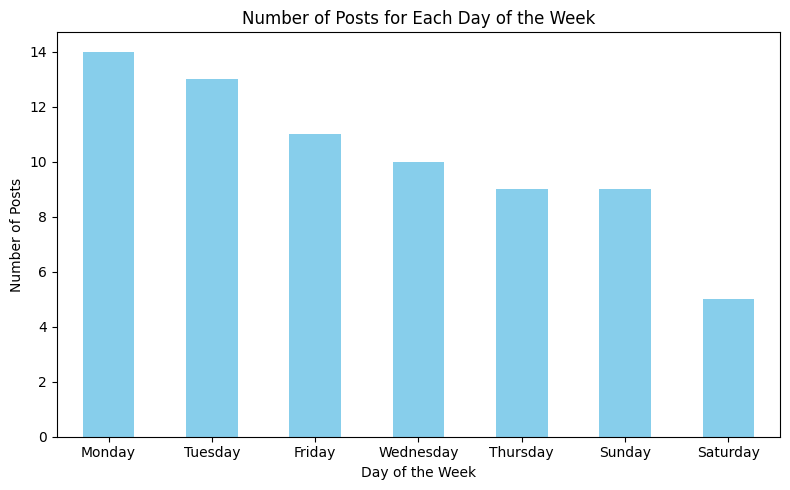

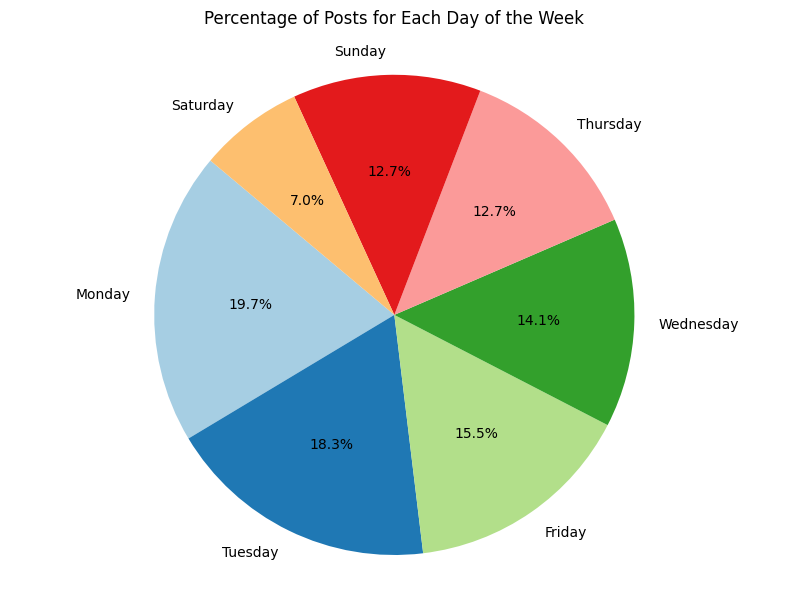

In [16]:
# Convert 'date' column to datetime format
date = pd.to_datetime(df['date'], format='%d/%m')

# Extract day of week from 'date' column
df['day_of_week'] = date.dt.strftime('%A')
day_counts = df['day_of_week'].value_counts()

# Plot the number of posts for each day of the week
plt.figure(figsize=(8, 5))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Posts for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot the percentage of posts for each day of the week
plt.figure(figsize=(8, 6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Posts for Each Day of the Week', pad = 20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

- 38% of posts are published at the beginning of the week, with Monday alone accounting for 19.7%. Friday sees 15.5% of posts. In total, 53.5% of posts are published on Monday, Tuesday, and Friday.

- Only 19.7% of posts are published over the weekend, with Saturday alone accounting for just 7%.

**Comment:**

&nbsp;&nbsp;&nbsp;&nbsp;Brands typically publish posts at the beginning of the week or, as a last resort, on the final day. It's rare for posts to be published over the weekend.


### 2.2.2. Content

#### a. Hashtag


In [17]:
brand_dfs = {'coke': coke, 'pepsi': pepsi, 'fanta': fanta}

In [18]:
def analyse_hashtag(df, brand):
    hashtag_summary = adv.extract_hashtags(df)
    print(f'{(brand.upper())} hashtag summary')
    print(f'Top hashtags for {brand}: {hashtag_summary["top_hashtags"]}')
    print(f'Hashtag frequency for {brand}: {hashtag_summary["hashtag_freq"]}')
    plt.figure(facecolor='#ebebeb', figsize=(6, 3))
    plt.bar([x[0] for x in hashtag_summary['hashtag_freq']],
            [x[1] for x in hashtag_summary['hashtag_freq']])
    plt.title(f'Hashtag frequency for {brand}', fontsize=12)
    plt.xlabel('Hashtags per post', fontsize=12)
    plt.ylabel('Number of posts', fontsize=12)
    plt.xticks((0,1))
    plt.grid(alpha=0.5)
    plt.show()

COKE hashtag summary
Top hashtags for coke: [('#cocacolakwave', 8), ('#cocacolavn', 3), ('#foodmarkscủa', 1)]
Hashtag frequency for coke: [(0, 23), (1, 12)]


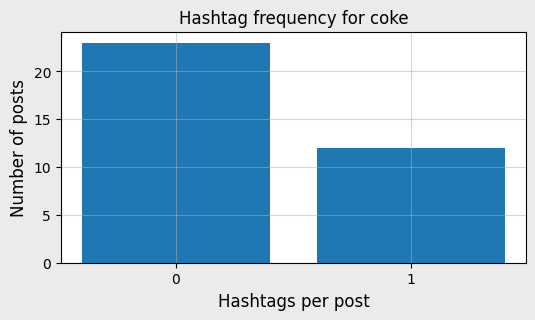

PEPSI hashtag summary
Top hashtags for pepsi: []
Hashtag frequency for pepsi: [(0, 29)]


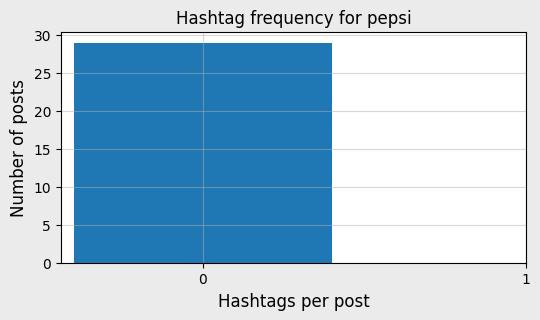

FANTA hashtag summary
Top hashtags for fanta: []
Hashtag frequency for fanta: [(0, 7)]


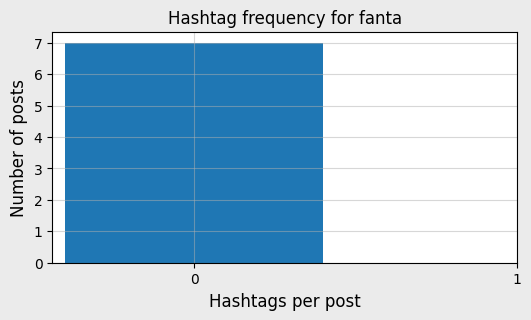

In [19]:
for brand_name, df in brand_dfs.items():
    analyse_hashtag(df['content'], brand_name)

**Comment:**

- Only Coca-Cola used hashtags in their posts, with three different hashtags used during the timeframe. Coca-Cola included a hashtag in 12 out of 35 posts, using one hashtag per post.

- Other brands did not use any hashtag during the timeframe.


#### b. Emoji


In [20]:
def analyse_emoji(df, brand):
    hashtag_summary = adv.extract_emoji(df)
    print(f'{(brand.upper())} emoji summary')
    print(f'- Top 10 emojis for {brand}: {hashtag_summary["top_emoji"][0:10]}')
    print(f'- Emoji frequency for {brand}: {hashtag_summary["emoji_freq"]}')
    print(f'- Top 10 emoji subgroups for {brand}: {hashtag_summary["top_emoji_sub_groups"][0:10]}')
    plt.figure(facecolor='#ebebeb', figsize=(6, 3))
    plt.bar([x[0] for x in hashtag_summary['emoji_freq']],
            [x[1] for x in hashtag_summary['emoji_freq']])
    plt.title(f'Emoji frequency for {brand}', fontsize=12)
    plt.xlabel('Emojis per post', fontsize=12)
    plt.ylabel('Number of posts', fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

COKE emoji summary
- Top 10 emojis for coke: [('🙌', 4), ('🔥', 3), ('✅', 3), ('😉', 2), ('🥰', 2), ('👉', 2), ('👇🏻', 2), ('👍', 2), ('😎', 2), ('🌟', 2)]
- Emoji frequency for coke: [(0, 10), (1, 12), (2, 8), (3, 2), (4, 1), (5, 1), (6, 1)]
- Top 10 emoji subgroups for coke: [('face-affection', 6), ('sky & weather', 5), ('hand-single-finger', 5), ('face-smiling', 4), ('hands', 4), ('office', 3), ('other-symbol', 3), ('face-hand', 2), ('emotion', 2), ('face-tongue', 2)]


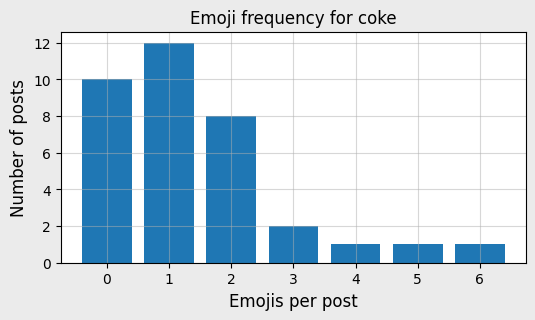

PEPSI emoji summary
- Top 10 emojis for pepsi: [('🔥', 13), ('🤘', 7), ('💙', 6), ('⚡', 5), ('🙌', 3), ('🎉', 2), ('🔈', 2), ('🍻', 1), ('💛', 1), ('🎫', 1)]
- Emoji frequency for pepsi: [(0, 4), (1, 10), (2, 12), (3, 2), (7, 1)]
- Top 10 emoji subgroups for pepsi: [('sky & weather', 18), ('hand-fingers-partial', 9), ('emotion', 8), ('event', 3), ('hands', 3), ('sound', 2), ('drink', 1), ('person-symbol', 1), ('office', 1), ('face-concerned', 1)]


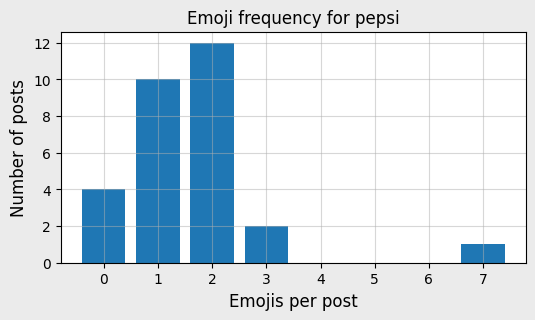

FANTA emoji summary
- Top 10 emojis for fanta: [('💥', 3), ('👉', 2), ('👋', 1), ('🥳', 1), ('🍊', 1), ('🍇', 1), ('💃', 1), ('🕺', 1), ('🤘', 1), ('🤤', 1)]
- Emoji frequency for fanta: [(0, 2), (2, 1), (3, 2), (4, 1), (6, 1)]
- Top 10 emoji subgroups for fanta: [('emotion', 6), ('hand-single-finger', 3), ('food-fruit', 2), ('person-activity', 2), ('hand-fingers-open', 1), ('face-hat', 1), ('hand-fingers-partial', 1), ('face-sleepy', 1), ('face-tongue', 1)]


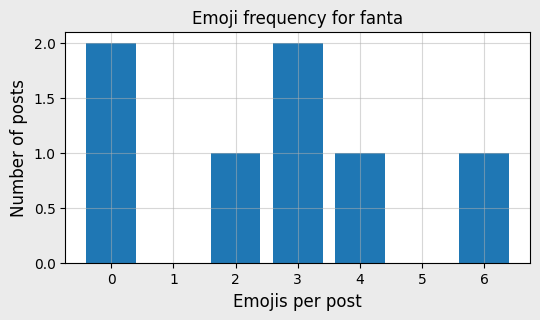

In [21]:
for brand_name, df in brand_dfs.items():
    analyse_emoji(df['content'], brand_name)

In [22]:
coke_emoji_summary = adv.extract_emoji(coke['content'])
pepsi_emoji_summary = adv.extract_emoji(pepsi['content'])
fanta_emoji_summary = adv.extract_emoji(fanta['content'])

coke_subgroups = {item[0] for item in coke_emoji_summary['top_emoji_sub_groups']}
pepsi_subgroups = {item[0] for item in pepsi_emoji_summary['top_emoji_sub_groups']}
fanta_subgroups = {item[0] for item in fanta_emoji_summary['top_emoji_sub_groups']}

subgroups = [coke_subgroups, pepsi_subgroups, fanta_subgroups]

# Tìm các subgroup chung giữa từng cặp thương hiệu
for i in range(len(subgroups)):
    for j in range(i + 1, len(subgroups)):
        common_subgroups = subgroups[i] & subgroups[j]
        print(f"Common subgroups between {brands[i].upper()} and {brands[j].upper()}: {common_subgroups}")

Common subgroups between COKE and PEPSI: {'emotion', 'hands', 'sound', 'sky & weather', 'hand-fingers-partial', 'office', 'event', 'face-concerned'}
Common subgroups between COKE and FANTA: {'emotion', 'hand-single-finger', 'hand-fingers-partial', 'face-hat', 'face-tongue'}
Common subgroups between PEPSI and FANTA: {'hand-fingers-partial', 'emotion'}


**Comment:**

- A significant proportion of posts contain no emojis.

- Coca-Cola and Pepsi typically use 1-2 emojis in their posts.

- Fanta, with only 7 posts, uses between 2 and 6 emojis per post.

- Common emoji subgroups are: `face-concerned`, `emotion`, `hand-fingers-partial`, `hand-single-finger`, `event`, `hands`, `sound`.


#### c. Words

In [23]:
def analyse_word(df, brand, words_to_extract):

  word_summary = adv.extract_words(df, words_to_extract=words_to_extract, entire_words_only=False)

  word_count = {}
  for word in word_summary['top_words']:
    for keyword in words_to_extract:
      if keyword in word[0]:
        word_count[keyword] = 0
  for keyword in word_count:
    for word in word_summary['top_words']:
      if keyword in word[0]:
        word_count[keyword] += word[1]

  # Sort the word count dictionary by values in descending order
  sorted_word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
  return sorted_word_count

def calculate_category_totals(word_count, categories):
  category_totals = {category: 0 for category in categories}

  for category, words in categories.items():
      for word in words:
          if word in word_count:
              category_totals[category] += word_count[word]

  return category_totals

After manually reviewing the content of the posts, I suggest tracking certain words to gain insights into the posting behavior of each brand. These words are divided into common themes like:

- Brands: 'coca-cola', 'pepsi', 'fanta'.

- Music-related: 'dàn sao', 'nghệ sĩ', 'rap', 'nhạc', 'sự kiện', 'k-pop', 'idol'.

- Promotions: 'quà', 'trúng thưởng', 'minigame', 'game', 'săn', 'khuyến mãi', 'k-wave', 'kwave'.

- Food-related: 'ẩm thực', 'quán', 'món'.

In [24]:
words_to_extract=['coca-cola', 'pepsi', 'fanta', 'dàn sao', 'nghệ sĩ', 'rap', 'nhạc', 'sự kiện', 'quà', 'trúng thưởng', 'minigame', 'game', 'săn', 'khuyến mãi', 'k-wave', 'kwave', 'k-pop', 'idol', 'ẩm thực', 'quán', 'món']

categories = {
    'brand_content': ['coca-cola', 'pepsi', 'fanta'],
    'music_related_content': ['dàn sao', 'nghệ sĩ', 'rap', 'nhạc', 'sự kiện', 'k-pop', 'idol'],
    'promotions_content': ['quà', 'trúng thưởng', 'minigame', 'game', 'săn', 'khuyến mãi', 'k-wave', 'kwave'],
    'food_related_content': ['ẩm thực', 'quán', 'món']
}

Words extraction for COKE's posts:
{'brand_content': 45, 'music_related_content': 14, 'promotions_content': 47, 'food_related_content': 21}


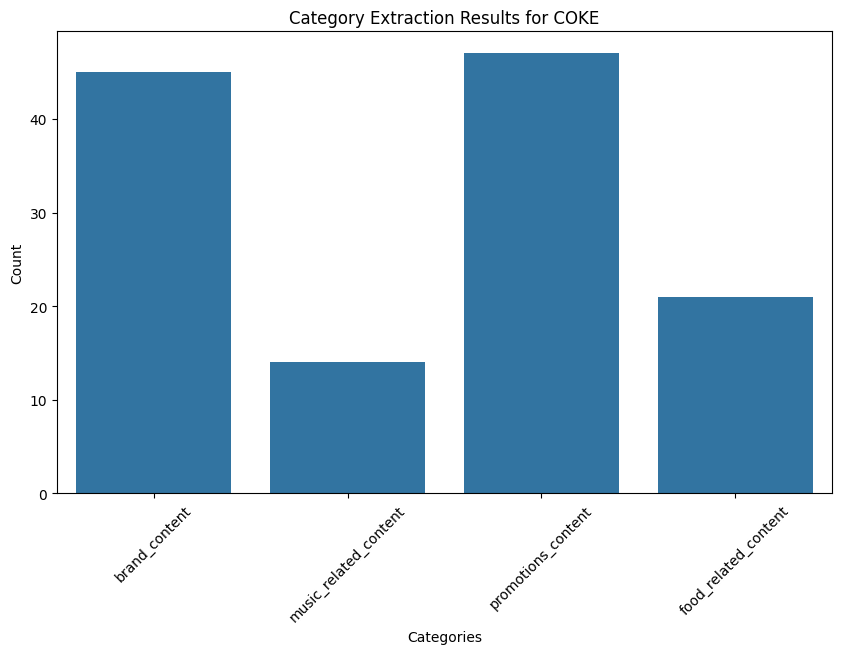

Words extraction for PEPSI's posts:
{'brand_content': 60, 'music_related_content': 39, 'promotions_content': 8, 'food_related_content': 2}


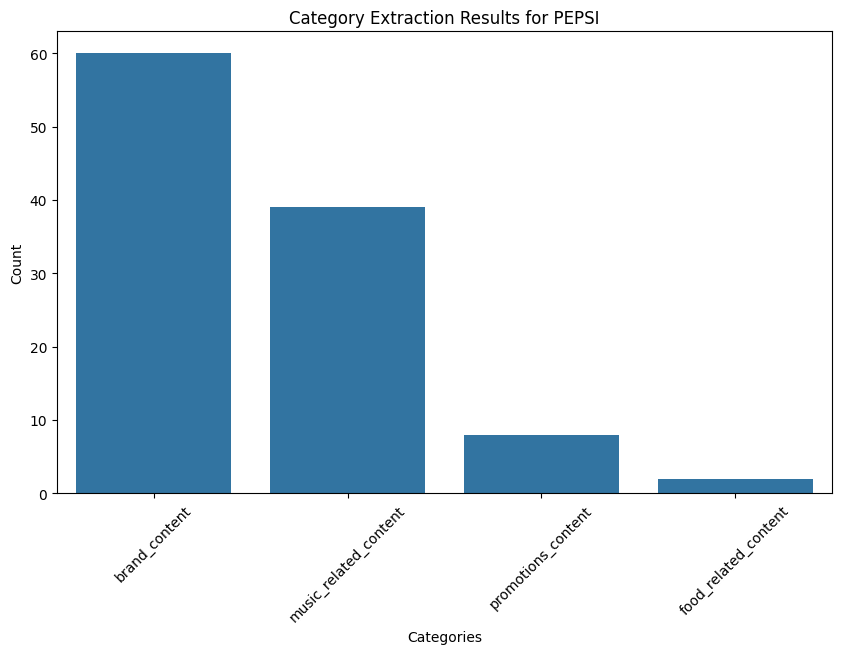

Words extraction for FANTA's posts:
{'brand_content': 12, 'music_related_content': 0, 'promotions_content': 5, 'food_related_content': 0}


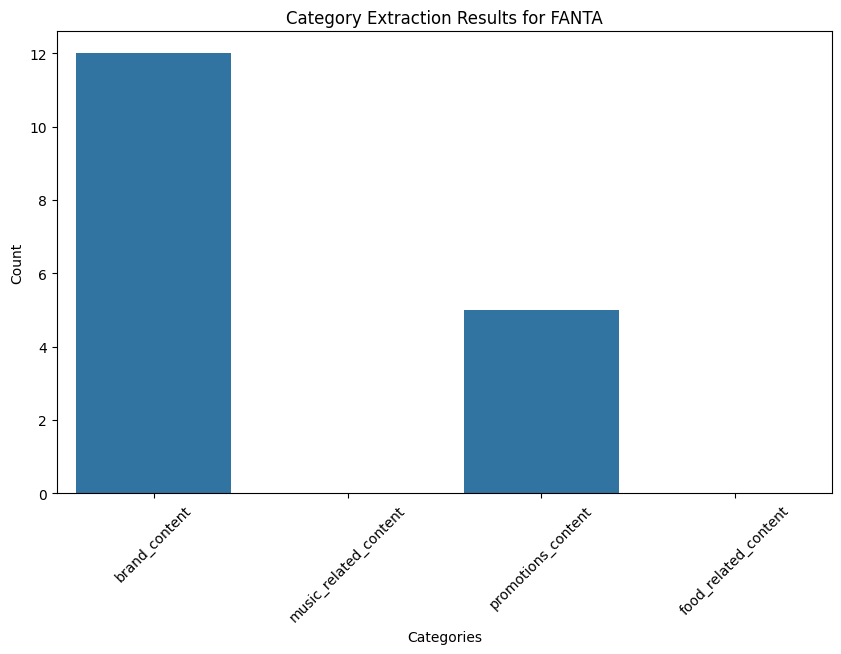

In [25]:
for brand_name, df in brand_dfs.items():
    print(f"Words extraction for {brand_name.upper()}'s posts:")
    
    # Extract word counts for the current brand
    words_to_extract = [word for words in categories.values() for word in words]
    word_count = analyse_word(df['content'], brand_name, words_to_extract)
    
    # Calculate category totals
    category_totals = calculate_category_totals(word_count, categories)
    print(category_totals)
    
    # Create bar chart for each brand using Matplotlib
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(category_totals.keys()), y=list(category_totals.values()))
    plt.title(f"Category Extraction Results for {brand_name.upper()}")
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

**Comment:**

- Brands frequently remind their audience about themselves in their posts.

- Coca-Cola promotes their new product, K-Wave, and maintains engagement with numerous food tour, promotional posts, mini-games, and gift giveaways. They have a small number of music-related posts.

- Pepsi primarily focuses on music events, announcing concerts with pop stars, and also a few mini-game posts.

- Fanta's content is limited, consisting only of giveaway posts.


### 2.2.3. Top reaction


In [26]:
reaction_to_extract = ['like', 'love', 'haha', 'wow', 'sad', 'angry', 'heart']

Top Reaction extraction for COKE's posts:
{'like': 35, 'heart': 35, 'wow': 8, 'angry': 5, 'sad': 3}


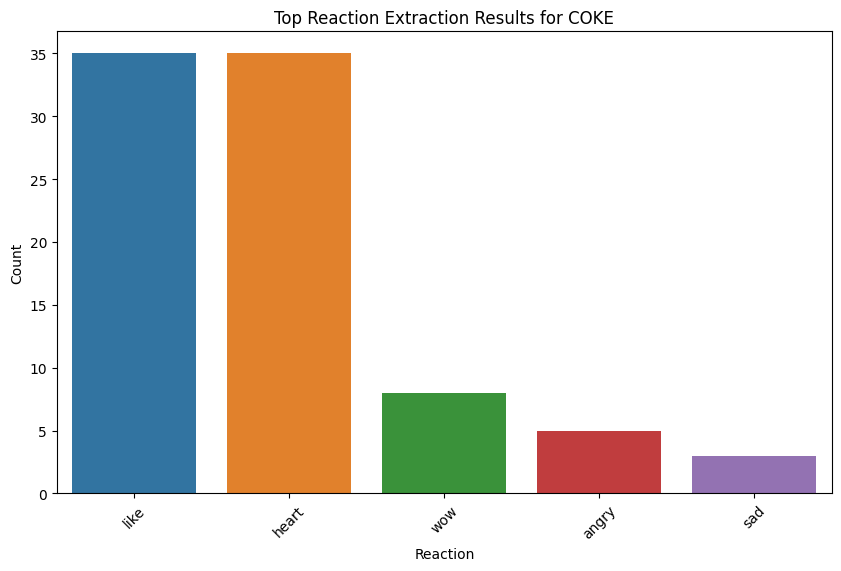

Top Reaction extraction for PEPSI's posts:
{'like': 29, 'heart': 29, 'wow': 4, 'angry': 1}


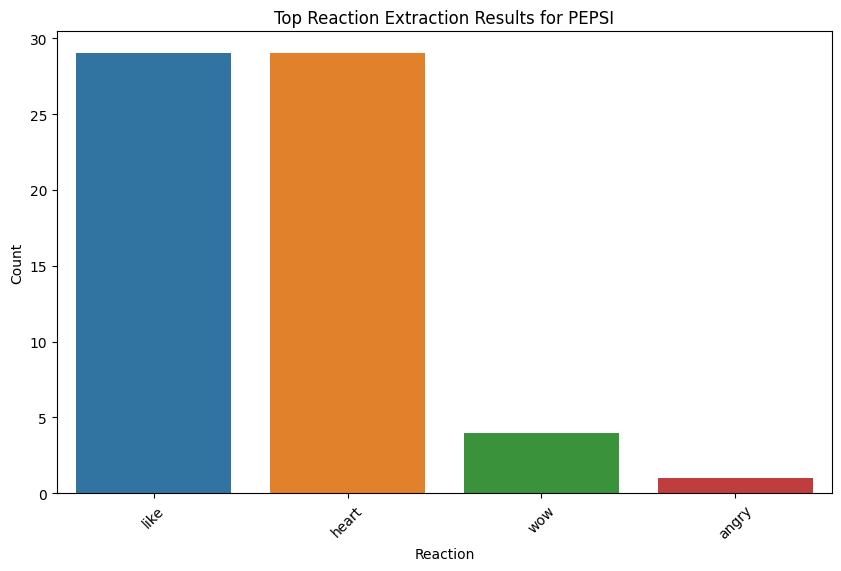

Top Reaction extraction for FANTA's posts:
{'like': 7, 'heart': 7, 'wow': 1, 'angry': 1}


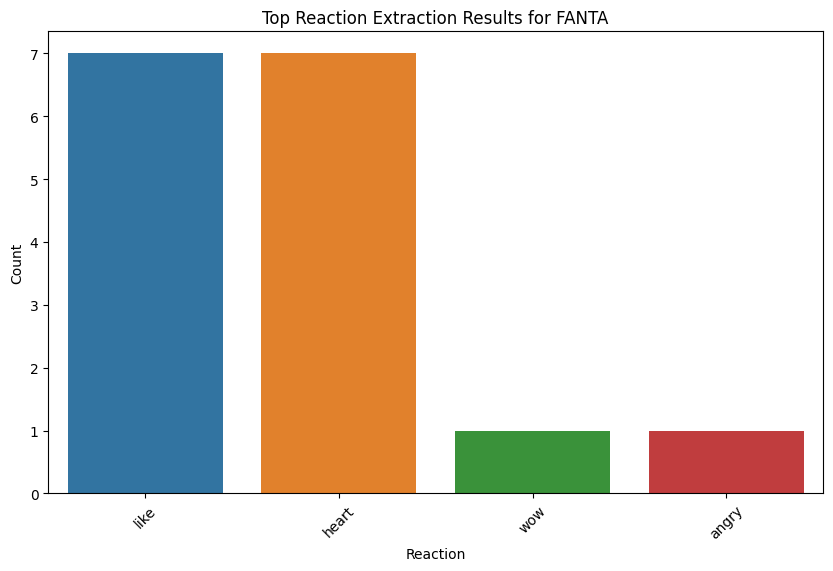

In [27]:
for brand_name, df in brand_dfs.items():
    print(f"Top Reaction extraction for {brand_name.upper()}'s posts:")
    reaction_count = analyse_word(df['top_react'], brand_name, reaction_to_extract)
    print(reaction_count)
    
    # Create bar chart for each brand using Matplotlib
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(reaction_count.keys()), y=list(reaction_count.values()), hue=list(reaction_count.keys()), legend=False)
    plt.title(f"Top Reaction Extraction Results for {brand_name.upper()}")
    plt.xlabel("Reaction")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

**Comment:**

- The most common reactions to brands' posts are `like` and `heart`, while other reactions are much less frequent.


---


## 2.3. Multivariate analysis

### 2.3.1. Date vs Day Diff


Day difference for COKE's posts:
Posting frequency: 0.42 posts per day
Mean day difference: 2.37 days
Balanced Posting Index: 0.72


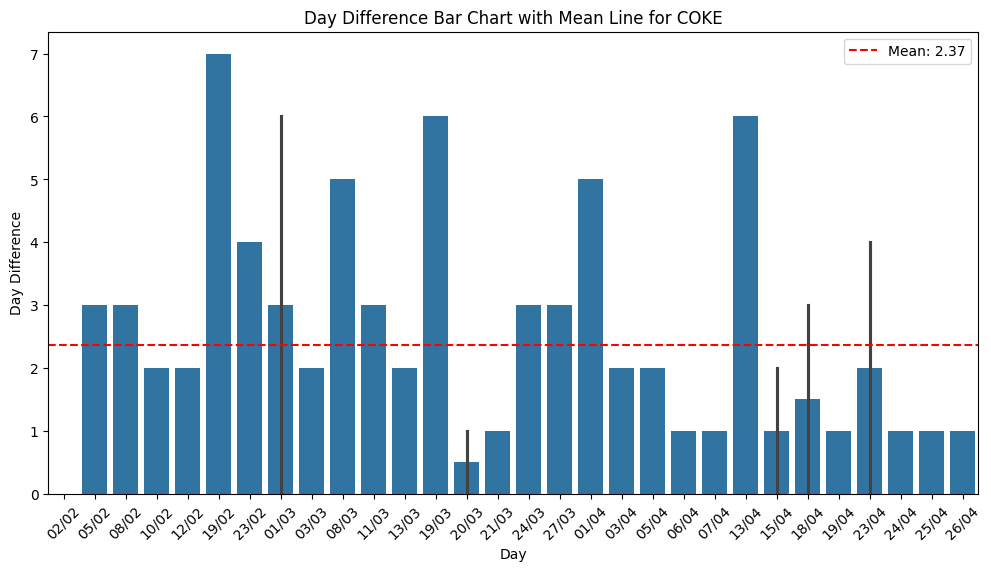

Day difference for PEPSI's posts:
Posting frequency: 0.54 posts per day
Mean day difference: 1.86 days
Balanced Posting Index: 0.83


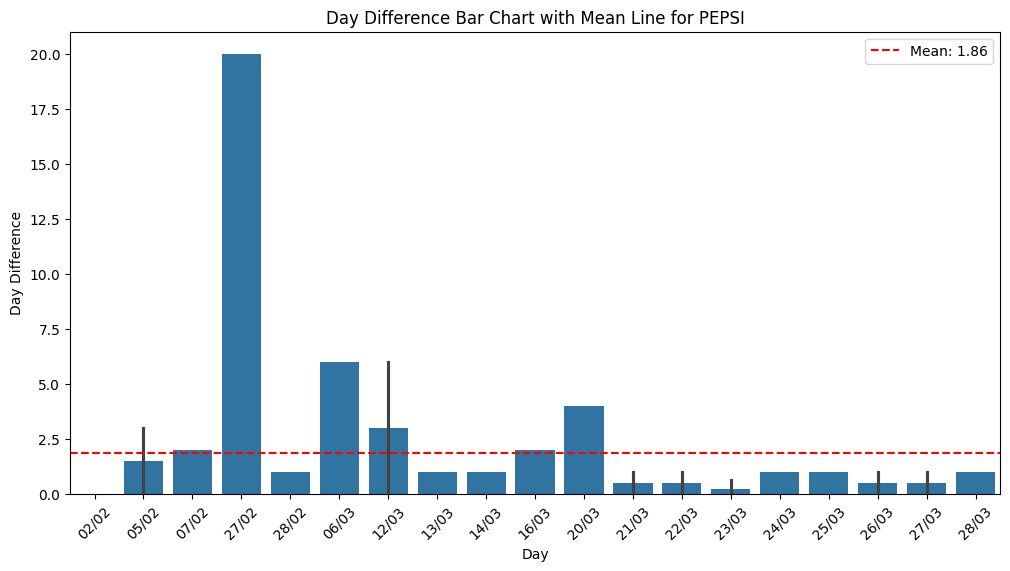

Day difference for FANTA's posts:
Posting frequency: 0.09 posts per day
Mean day difference: 11.00 days
Balanced Posting Index: 0.18


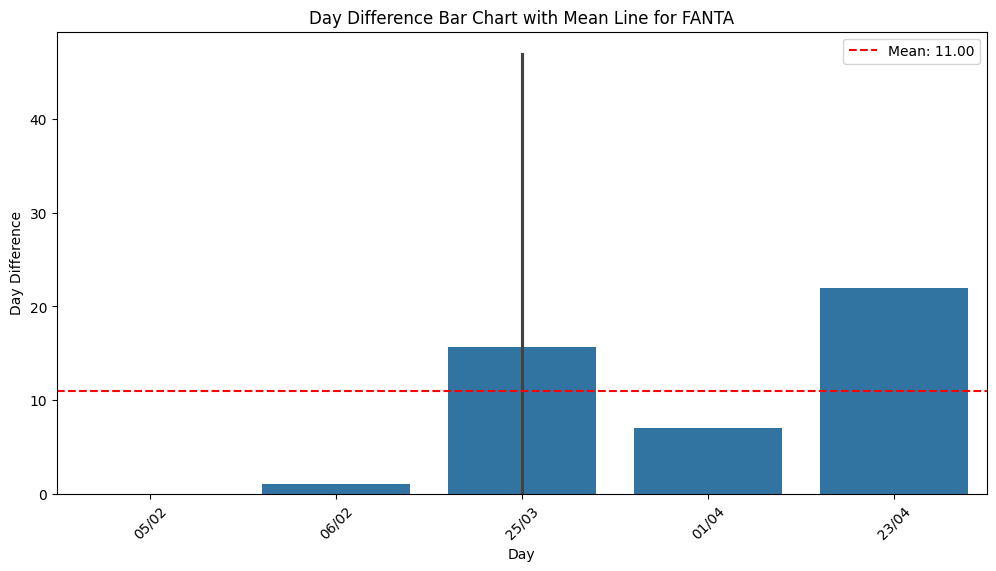

In [28]:
for brand_name, df in brand_dfs.items():
    print(f"Day difference for {brand_name.upper()}'s posts:")

    # Posting frequency calculation
    date = pd.to_datetime(df['date'], format='%d/%m')
    day_range = date.max() - date.min()
    posting_frequency = df.shape[0] / day_range.days
    print(f"Posting frequency: {posting_frequency:.2f} posts per day")

    # Calculate the mean day difference
    mean_day_diff = df['day_diff'].mean()
    print(f"Mean day difference: {mean_day_diff:.2f} days")

    # Calculate Balanced Posting Index
    bpi = 2/((1/posting_frequency) + (1/mean_day_diff))
    print(f"Balanced Posting Index: {bpi:.2f}")

    # Establish the day difference between the post date and the current date
    plt.figure(figsize=(12, 6))
    # Create a DataFrame to store the day difference
    sns.barplot(x='date', y='day_diff', data=df)
    # Draw a horizontal line to represent the mean day difference
    plt.axhline(mean_day_diff, color='red', linestyle='--', label=f'Mean: {mean_day_diff:.2f}')
    # Establish the title and labels for the bar chart
    plt.title(f'Day Difference Bar Chart with Mean Line for {brand_name.upper()}')
    plt.xlabel('Day')
    plt.ylabel('Day Difference')
    plt.xticks(rotation=45)
    # Display the legend
    plt.legend()
    # Display the bar chart
    plt.show()

**Comment:**

- Coca-Cola was the most active poster during this period, averaging a post every 2.37 days and a frequency of 0.42 posts per day. Their posts tended to occur in bursts lasting 7-10 days, followed by breaks of 5-7 days before resuming.

- Pepsi maintained a fairly consistent posting schedule with occasional short breaks. They averaged a post every 1.86 days, amounting to a daily frequency of 0.54 posts. However, there was a period when Pepsi didn't post for about 20 days.

- Fanta posted infrequently during this period, with an average interval of 11 days between posts and a daily frequency of just 0.09 posts.

- Based on the Balanced Posting Index, Pepsi appears to maintain the most effective posting strategy, followed by Coca-Cola. Fanta has an ineffective Balanced Posting Index.

$$
\ BPI = \frac{2}{\frac{1}{\text{Posting frequency}} + \frac{1}{\text{Mean day difference}}} \
$$


### 2.3.2. Reaction count, Comment count and Share count correlation


In [29]:
coke[['reaction_count', 'comment_count', 'share_count']].corr()

,reaction_count,comment_count,share_count
reaction_count,1.000000,0.553882,0.346121
comment_count,0.553882,1.000000,0.869604
share_count,0.346121,0.869604,1.000000


In [30]:
pepsi[['reaction_count', 'comment_count', 'share_count']].corr()

,reaction_count,comment_count,share_count
reaction_count,1.000000,0.667413,0.637079
comment_count,0.667413,1.000000,0.972968
share_count,0.637079,0.972968,1.000000


In [31]:
fanta[['reaction_count', 'comment_count', 'share_count']].corr()

,reaction_count,comment_count,share_count
reaction_count,1.000000,0.368190,0.405797
comment_count,0.368190,1.000000,0.998962
share_count,0.405797,0.998962,1.000000


**Comment:**

- **Coke**:

  - Overall, the strongest relationship is between comment counts and share counts, indicating that these two metrics are closely related. Reaction counts have a moderate relationship with comment counts and a weaker relationship with share counts.

  - **Content Strategy**: Focusing on increasing comment engagement might also drive up shares, given their strong correlation.

  - **Engagement Analysis**: While reactions are important, comments might be a stronger indicator of whether a post will be shared.

  - **Campaigns**: For campaigns aimed at increasing shares, strategies that encourage comments might be particularly effective.

- **Pepsi**:

  - **Enhanced Content Strategy**: Given the stronger correlations, focusing on increasing one type of engagement (e.g., reactions) is more likely to positively influence the others (comments and shares).

  - **Holistic Engagement**: Strategies that boost reactions can be particularly effective since there is now a stronger indication that reactions are linked to both comments and shares.

  - **Campaigns and Metrics**: Emphasizing user interactions that encourage both comments and shares could lead to more viral content, given the very strong correlation between these two metrics.

- **Fanta**:

  - **Content Strategy**:

    - Focus on Comments and Shares: Since comments and shares have a near-perfect correlation, driving up comments is likely to also drive up shares. This can be leveraged to create more viral content.

    - Moderate Focus on Reactions: While reactions have a weaker correlation with comments and shares, encouraging reactions can still positively impact overall engagement, albeit to a lesser extent.

  - **Engagement Analysis**:

    - Interconnected but Varying: The varying strengths of correlations suggest different engagement dynamics. Efforts to enhance comment and share counts should be prioritized over reactions due to their stronger interconnection.

  - **Campaign Effectiveness**:

    - Comments as a Key Driver: Campaigns aimed at increasing engagement should emphasize strategies that boost comments, as this will likely lead to higher shares, significantly amplifying content reach.
    - Balanced Approach: While focusing on comments and shares, maintaining efforts to garner reactions can still provide incremental benefits.


### 2.3.3. Date vs Reaction count, Comment count, Share count


1. **Reaction rate (ER):** <br>

   The RR measures the level of interaction your content receives relative to how many people you have following your brand. It strongly indicates how well your content resonates with your audience. <br>

   $$
   \ RR = \frac{\text{Reaction count}}{\text{Followers count}} \
   $$

2. **Comment rate (CR):** <br>

   The comment rate is the number of comments per post relative to your followers or reach. This metric can gauge the conversation your content is sparking.

   $$
   \ CR = \frac{\text{Comment count}}{\text{Followers count}} \
   $$

3. **Share Rate (SR):** <br>

   The SR measures the proportion of your followers who share your content, reflecting the content's perceived value and shareability.

   $$
   \ SR = \frac{\text{Share count}}{\text{Followers count}} \
   $$


In [32]:
# Engagement rate
coke['RR_per_million'] = coke['reaction_count'] * 1000000 / brand_follower_df['coke'][0]
pepsi['RR_per_million'] = pepsi['reaction_count'] * 1000000 / brand_follower_df['pepsi'][0]
fanta['RR_per_million'] = fanta['reaction_count'] * 1000000 / brand_follower_df['fanta'][0]

#Comment rate
coke['CR_per_million'] = coke['comment_count'] * 1000000 / brand_follower_df['coke'][0]
pepsi['CR_per_million'] = pepsi['comment_count'] * 1000000 / brand_follower_df['pepsi'][0]
fanta['CR_per_million'] = fanta['comment_count'] * 1000000 / brand_follower_df['fanta'][0]

#Share rate
coke['SR_per_million'] = coke['share_count'] * 1000000 / brand_follower_df['coke'][0]
pepsi['SR_per_million'] = pepsi['share_count'] * 1000000 / brand_follower_df['pepsi'][0]
fanta['SR_per_million'] = fanta['share_count'] * 1000000 / brand_follower_df['fanta'][0]

Coke Metrics Over Time
Mean Reaction Rate (per million): 27.95
Mean Comment Rate (per million): 4.06
Mean Share Rate (per million): 1.35


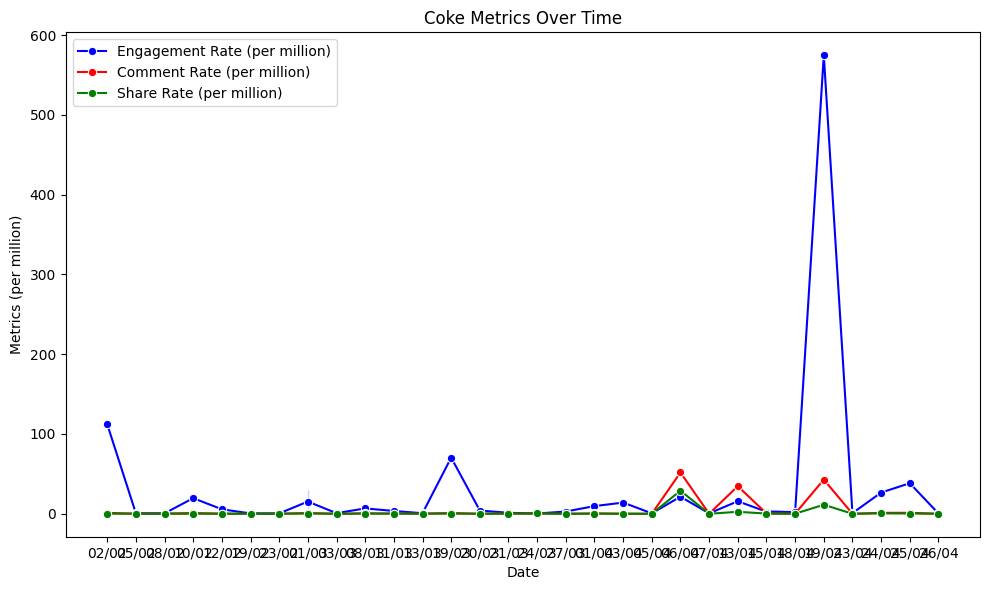

Pepsi Metrics Over Time
Mean Reaction Rate (per million): 26.86
Mean Comment Rate (per million): 1.74
Mean Share Rate (per million): 0.96


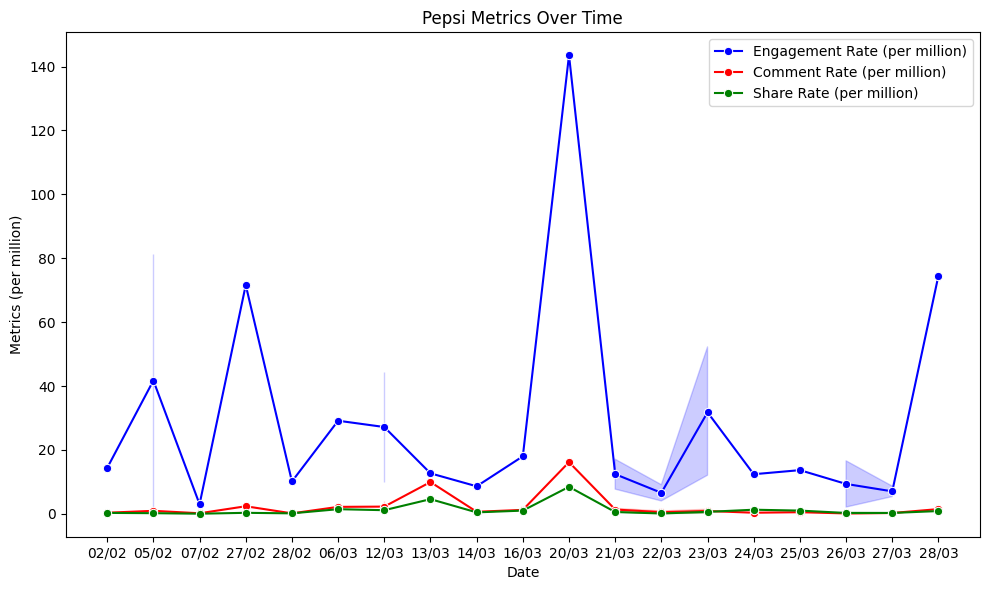

Fanta Metrics Over Time
Mean Reaction Rate (per million): 122.24
Mean Comment Rate (per million): 38.83
Mean Share Rate (per million): 3.74


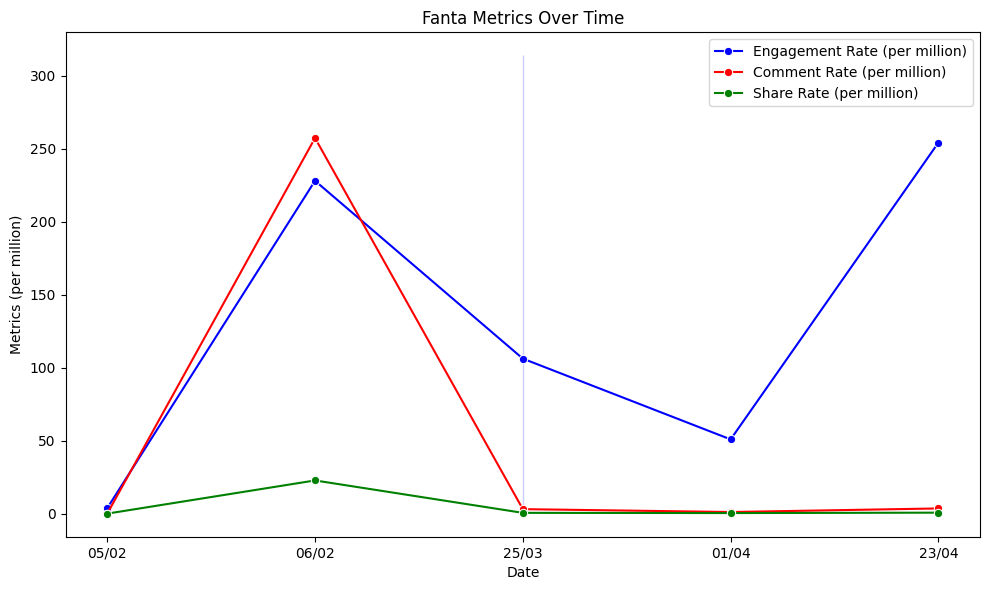

In [33]:
# Define the colors for each metric
metric_colors = {
    'RR_per_million': 'blue',
    'CR_per_million': 'red',
    'SR_per_million': 'green'
}

# Define titles for each metric
metric_titles = {
    'RR_per_million': 'Engagement Rate (per million)',
    'CR_per_million': 'Comment Rate (per million)',
    'SR_per_million': 'Share Rate (per million)'
}

# Plot for each brand
for brand_name, df in brand_dfs.items():
    print(f'{brand_name.capitalize()} Metrics Over Time')
    print(f'Mean Reaction Rate (per million): {df["RR_per_million"].mean():.2f}')
    print(f'Mean Comment Rate (per million): {df["CR_per_million"].mean():.2f}')
    print(f'Mean Share Rate (per million): {df["SR_per_million"].mean():.2f}')

    plt.figure(figsize=(10, 6))
    
    # Plot each metric
    for metric, color in metric_colors.items():
        sns.lineplot(x=df['date'], y=df[metric], label=metric_titles[metric], color=color, marker='o')
    
    plt.title(f'{brand_name.capitalize()} Metrics Over Time')
    plt.xlabel('Date')
    plt.ylabel('Metrics (per million)')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

**Comment:**

- **Coca-Cola**: most of the time, all metrics stay below 100 per million, with the Reaction Rate occasionally spiking above this level.

- **Pepsi**: Reaction Rate is the most volatile metric, with dramatic ups and downs. Comment and Share Rates tend to follow the pattern of Reaction Rate but with less intensity. There are periods of low activity interspersed with sudden spikes in reaction.

- **Fanta**: Reaction Rate shows an increasing trend over time, despite a drop in the middle of the timeframe. Comment Rate drops sharply after a peak and remains low for the rest of the period. Share Rate is consistently the lowest of the three metrics.

### 2.3.4. Date vs Reaction count, Comment count, Share count, Content

In [34]:
def safe_to_datetime_with_default_year(date_series, default_year=2024):
    def set_year_to_default(date):
        try:
            # Manually parse the date in the format 'dd/mm' and add the default year
            day, month = map(int, date.split('/'))
            return pd.to_datetime(f'{default_year}-{month:02d}-{day:02d}')
        except (ValueError, AttributeError):
            return pd.NaT
        
    return date_series.apply(set_year_to_default)

# Update analyse_word_by_date function to include social metrics
def analyse_word_by_date(df, brand, words_to_extract):
    df['date'] = safe_to_datetime_with_default_year(df['date'])  # Ensure 'date' column is datetime type
    df = df.dropna(subset=['date'])  # Drop rows where date could not be converted
    
    word_count_by_date = {}
    
    for date, group in df.groupby(df['date'].dt.date):
        # Calculate total reactions, comments, shares for the day
        reaction_count = group['reaction_count'].sum()
        comment_count = group['comment_count'].sum()
        share_count = group['share_count'].sum()
        
        # Extract word occurrences for the day
        daily_word_summary = adv.extract_words(group['content'].tolist(), words_to_extract=words_to_extract, entire_words_only=False)
        
        daily_word_count = {keyword: 0 for keyword in words_to_extract}
        for word, count in daily_word_summary['top_words']:
            for keyword in words_to_extract:
                if keyword in word:
                    daily_word_count[keyword] += count
        
        # Include reaction, comment, share counts in the result
        daily_word_count.update({
            'reaction_count': reaction_count,
            'comment_count': comment_count,
            'share_count': share_count
        })
        
        word_count_by_date[date] = daily_word_count
    
    return word_count_by_date

In [35]:
# Initialize an empty list to collect all results
all_results = []

# Iterate over each brand and its corresponding DataFrame
for brand_name, df in brand_dfs.items():
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Create word check table for the current brand
    word_check_table = analyse_word_by_date(df_copy, brand_name, words_to_extract)
    
    # Convert the word check table to DataFrame
    for date, word_counts in word_check_table.items():
        result = {'Brand': brand_name, 'Date': date}
        result.update(word_counts)
        all_results.append(result)

# Create a DataFrame from all results
word_count_by_date_df = pd.DataFrame(all_results)

# Fill NaN values with 0 for better readability
word_count_by_date_df = word_count_by_date_df.fillna(0)

# Ensure 'reaction_count', 'comment_count', 'share_count' are included
word_count_by_date_df = word_count_by_date_df[['Brand', 'Date', 'reaction_count', 'comment_count', 'share_count'] + words_to_extract]

# Content categories
brand_columns = ['coca-cola', 'pepsi', 'fanta']
music_related_columns = ['dàn sao', 'nghệ sĩ', 'rap', 'nhạc', 'sự kiện', 'k-pop', 'idol']
promotions_columns = ['quà', 'trúng thưởng', 'minigame', 'game', 'săn', 'khuyến mãi', 'k-wave', 'kwave']
food_related_columns = ['ẩm thực', 'quán', 'món']

# Calculate the total count for each category
word_count_by_date_df['brand_content'] = word_count_by_date_df[brand_columns].sum(axis=1)
word_count_by_date_df['music_related_content'] = word_count_by_date_df[music_related_columns].sum(axis=1)
word_count_by_date_df['promotions_content'] = word_count_by_date_df[promotions_columns].sum(axis=1)
word_count_by_date_df['food_related_content'] = word_count_by_date_df[food_related_columns].sum(axis=1)

# Drop the individual columns
word_count_by_date_df = word_count_by_date_df.drop(columns=brand_columns + music_related_columns + promotions_columns + food_related_columns)

For Coca-Cola, base on metrics above, only dates, in which spikes appear, are chosen to extract content.

In [36]:
# Pick a few dates to query
query_dates = [
  datetime.date(2024, 2, 2),
  datetime.date(2024, 2, 10),
  datetime.date(2024, 3, 1),
  datetime.date(2024, 3, 19),
  datetime.date(2024, 3, 20),
  datetime.date(2024, 3, 27),
  datetime.date(2024, 4, 1),
  datetime.date(2024, 4, 3),
  datetime.date(2024, 4, 6),
  datetime.date(2024, 4, 13),
  datetime.date(2024, 4, 15),
  datetime.date(2024, 4, 18),
  datetime.date(2024, 4, 19),
  datetime.date(2024, 4, 24),
  datetime.date(2024, 4, 25)
  ]

word_count_by_date_df.query("Brand == 'coke' and Date in @query_dates")

,Brand,Date,reaction_count,comment_count,share_count,brand_content,music_related_content,promotions_content,food_related_content
0,coke,2024-02-02,12240,121,22,2,0,2,0
3,coke,2024-02-10,2136,105,7,1,0,0,0
7,coke,2024-03-01,3338,211,64,1,0,1,0
12,coke,2024-03-19,7673,102,22,3,0,0,3
13,coke,2024-03-20,897,27,10,3,0,0,2
16,coke,2024-03-27,312,5,3,1,0,0,2
17,coke,2024-04-01,1051,52,15,0,0,1,0
18,coke,2024-04-03,1531,11,9,3,3,1,0
20,coke,2024-04-06,2336,5646,3157,1,0,3,4
22,coke,2024-04-13,1713,3772,270,2,3,0,0


<Axes: >

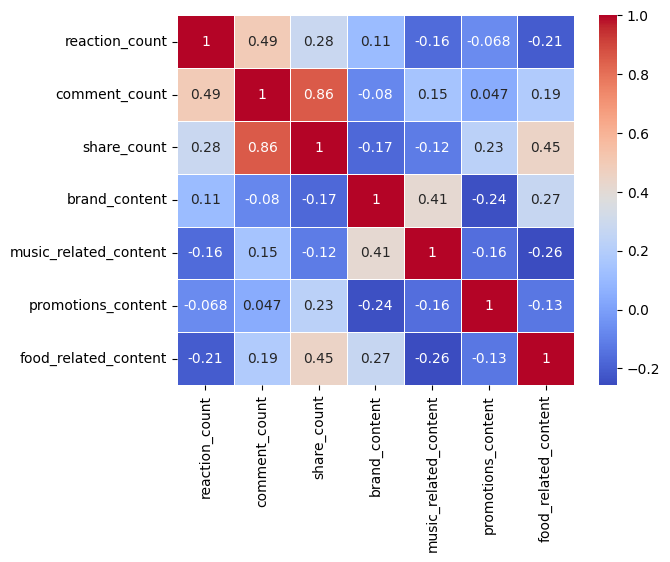

In [37]:
coke_corr = word_count_by_date_df.query("Brand == 'coke' and Date in @query_dates")[['reaction_count', 'comment_count', 'share_count', 'brand_content', 'music_related_content', 'promotions_content', 'food_related_content']].corr()

sns.heatmap(coke_corr, annot=True, cmap='coolwarm', linewidths=0.5)

In [38]:
word_count_by_date_df[word_count_by_date_df['Brand']=='pepsi']

,Brand,Date,reaction_count,comment_count,share_count,brand_content,music_related_content,promotions_content,food_related_content
30,pepsi,2024-02-02,517,12,10,3,0,0,0
31,pepsi,2024-02-05,3004,67,14,3,0,2,1
32,pepsi,2024-02-07,108,6,1,0,0,0,0
33,pepsi,2024-02-27,2578,85,11,0,0,0,0
34,pepsi,2024-02-28,364,5,5,0,0,0,0
35,pepsi,2024-03-06,1049,78,52,5,2,1,1
36,pepsi,2024-03-12,1956,162,81,7,4,0,0
37,pepsi,2024-03-13,456,358,165,1,1,4,0
38,pepsi,2024-03-14,310,23,16,1,3,0,0
39,pepsi,2024-03-16,648,44,36,2,1,0,0


<Axes: >

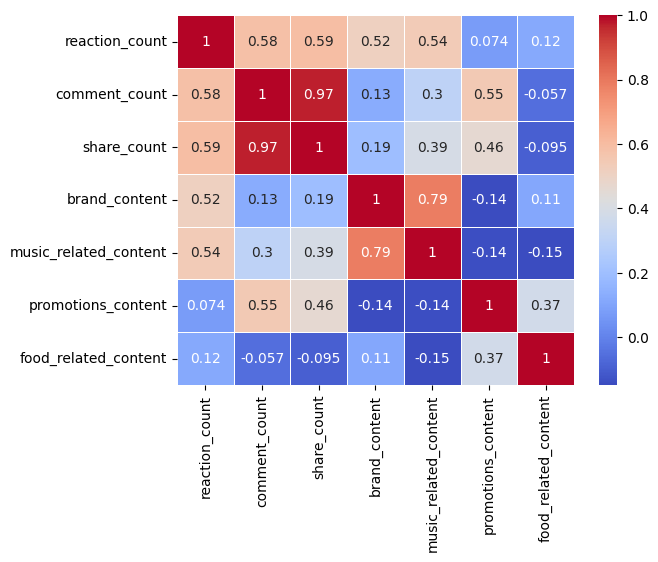

In [39]:
pepsi_corr = word_count_by_date_df.query("Brand == 'pepsi'")[['reaction_count', 'comment_count', 'share_count', 'brand_content', 'music_related_content', 'promotions_content', 'food_related_content']].corr()

sns.heatmap(pepsi_corr, annot=True, cmap='coolwarm', linewidths=0.5)

In [40]:
word_count_by_date_df[word_count_by_date_df['Brand']=='fanta']

,Brand,Date,reaction_count,comment_count,share_count,brand_content,music_related_content,promotions_content,food_related_content
49,fanta,2024-02-05,69,1,2,3,0,0,0
50,fanta,2024-02-06,4104,4631,411,0,0,4,0
51,fanta,2024-03-25,5737,172,35,4,0,1,0
52,fanta,2024-04-01,917,22,9,2,0,0,0
53,fanta,2024-04-23,4575,66,14,3,0,0,0


<Axes: >

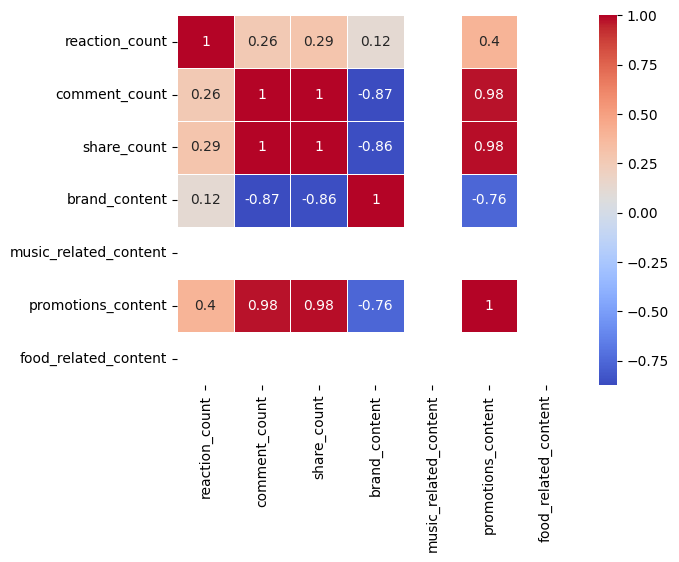

In [41]:
fanta_corr = word_count_by_date_df.query("Brand == 'fanta'")[['reaction_count', 'comment_count', 'share_count', 'brand_content', 'music_related_content', 'promotions_content', 'food_related_content']].corr()

sns.heatmap(fanta_corr, annot=True, cmap='coolwarm', linewidths=0.5)

**Comment:**

- **Coca-Cola**

- **Pepsi**: 

- **Fanta**: 

# 3. Epilogue
## 3.1
## 3.2. Source code
[Github Repo](https://github.com/dellacer2003/Brand-Watch-Report)